![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

## **Planteamiento de la problemática**

Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un importante hospital. **Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización.** Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. Dado que tienen en su base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado esta información.  

Para ello, nuestro departamento de datos ha recopilado `Antecedentes del paciente`, `Morbilidad asociada al paciente` y `Antecedentes relacionados con la toma de la biopsia`y `Complicaciones infecciosas`. En la siguiente tabla, se encuentra un diccionario de datos asociado:

![image](https://user-images.githubusercontent.com/118769777/220240501-8c21461d-2de5-495b-954e-10fb9bf38014.png)

El departamento de datos advierte que hay algunos **problemas de calidad de datos** en la información suministrada por lo que el primer reto del equipo es realizar un análisis exploratorio de los datos con el fin de transformar y preparar las datos adecuadamente. 

## 1. Análisis exploratorio de datos

Machine Learning en Medicina: Al aplicar Machine Learning en Medicina se pueden usar las herramientas informáticas, con el fin de conseguir información a partir de los datos, por ejemplo, de historias clínicas o registros de prestadores de servicios de salud. De esta manera, se pueden emitir diagnósticos predicitivos, evaluar la efectividad de estrategias de intervención y anticipar comportamientos en escenarios relacionados con la atención. 

## 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como **objetivo** la clasificación de un paciente como hospitalizado o no hospitalizado.


In [ ]:
# Importamos todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos la base de datos 
data=pd.read_excel('/content/BBDD_Hospitalización.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Revisión del dataset

In [ ]:
# revisamos los ultimos registros del dataset
data.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Eliminamoslos dos ultimos registros vacíos y los duplicados
data=data.drop(data.index[-2:])
data=data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        456 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Conversion de tipo de dato en variables numéricas

In [ ]:
# Cambiamos los registros indicados como NO a 0 para poder cambiar el tipo de dato a entero
data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace({'NO':0}, inplace=True)

# Realizamos la conversion del tipo de dato en las variables numericas
var_numericas=['EDAD', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC', 'NUMERO DE MUESTRAS TOMADAS' ]
for var in var_numericas: 
  data[var]=data[var].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    int64  
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        456 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Analisis de cada variable para descartar, en caso de ser necesario, aquellas consideradas irrelevantes

In [ ]:
# Correlacionamos algunas variables para analizar

pd.crosstab(data['CUP'], data['HOSPITALIZACIÓN ULTIMO MES'])

HOSPITALIZACIÓN ULTIMO MES,NO,SI
CUP,,
NO,452,4
SI,3,0


In [ ]:
pd.crosstab(data['BIOPSIA'], data['BIOPSIAS PREVIAS'])

BIOPSIAS PREVIAS,NO,SI
BIOPSIA,,
ADENOCARCINOMA GLEASON 10,4,0
ADENOCARCINOMA GLEASON 6,16,0
ADENOCARCINOMA GLEASON 6,29,8
ADENOCARCINOMA GLEASON 7,9,0
ADENOCARCINOMA GLEASON 7,92,7
ADENOCARCINOMA GLEASON 8,20,0
ADENOCARCINOMA GLEASON 9,20,0
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,2,0
HIPERPLASIA PROSTATICA,11,2


In [ ]:
pd.crosstab(data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], data['FIEBRE'])

FIEBRE,NO,SI
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,,
0,420,14
1,0,5
2,2,7
3,1,7
5,0,2
9,0,2


In [ ]:
pd.crosstab(data['ITU'], data['FIEBRE'])

FIEBRE,NO,SI
ITU,,
NO,423,31
SI,0,6


In [ ]:
pd.crosstab(data['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], data['ITU'])

ITU,NO,SI
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,,
0,434,0
1,5,0
2,5,4
3,8,0
5,0,2
9,2,0


Observaciones:
* El uso de cateter unirario (CUP) está muy relacionado con Hospitalizacion ultimo mes, además no aporta información relevante para el objetivo de estudio.
* Gran parte de los datos indican que el antibiotico utilizado fue FLUOROQUINOLONA_AMINOGLICÓSIDO, que además no aporta informacion para predecir hospitalizacion.
* La cantidad de dias en la que presenta complicación infecciosa está muy relacionado con las variables ITU y fiebre, ademas la maypria no presentó complicacion infecciosa. Por ende, se descarta esa columna.
* Tipo de cultivo, agente aislado y Patron de resistencia estan en su mayoria indicadas como NO, por lo que tampoco se considera relevante para la prediccion. 
* Los dias de hospitalizacion son consecuencia de la variable hospitalizacion que es la que nos interesa predecir, por lo que no revelan nada para este análisis.

In [ ]:
# Descartamos las columnas que aportan poca información

columns_irrelev=['CUP','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','TIPO DE CULTIVO','AGENTE AISLADO', 'PATRON DE RESISTENCIA','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC']
data=data.drop(columns_irrelev, axis=1)

#revisamos las variables con las que nos quedamos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 567
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               460 non-null    int64  
 1   DIABETES                           460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         460 non-null    object 
 3   PSA                                456 non-null    float64
 4   BIOPSIAS PREVIAS                   458 non-null    object 
 5   VOLUMEN PROSTATICO                 459 non-null    object 
 6   NUMERO DE MUESTRAS TOMADAS         460 non-null    int64  
 7   ENF. CRONICA PULMONAR OBSTRUCTIVA  458 non-null    object 
 8   BIOPSIA                            460 non-null    object 
 9   FIEBRE                             460 non-null    object 
 10  ITU                                460 non-null    object 
 11  HOSPITALIZACION                    457 non-null    object 

Evaluación de las distintas variables numéricas

In [ ]:
#revisamos los datos estadisticos de las variables numericas
data.describe() 

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS
count,460.000000,456.000000,460.000000
mean,64.213043,14.065921,12.923913
std,9.817853,17.043606,3.970572
min,39.000000,0.600000,4.000000
25%,59.000000,5.700000,12.000000
50%,64.000000,8.000000,12.000000
75%,69.000000,15.887500,12.000000
max,151.000000,100.000000,24.000000


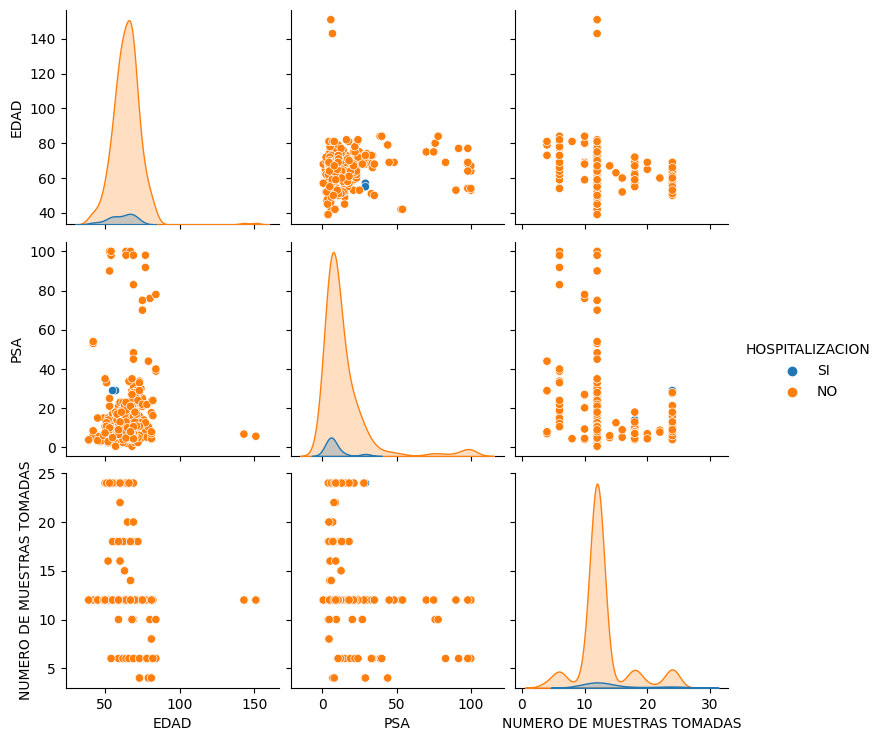

In [ ]:
# Hacemos un pairplot para ver la correlación entre las variables numericas

sns.pairplot(data, hue="HOSPITALIZACION")
plt.show()

<ipython-input-16-0743ff5474ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EDAD'], hist=True, kde=False, rug=False)


<Axes: xlabel='EDAD'>

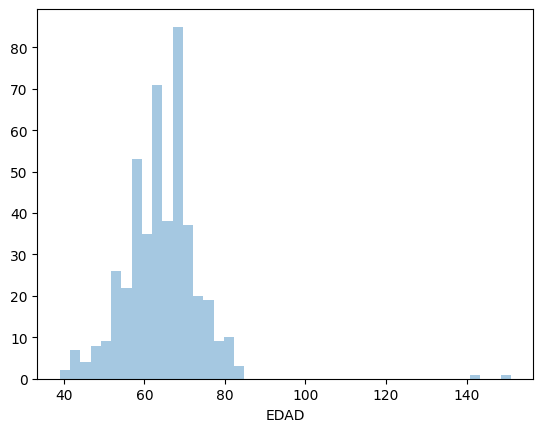

In [ ]:
# realizamos un histograma para ver la distribucion de la variable EDAD
sns.distplot(data['EDAD'], hist=True, kde=False, rug=False) 

In [ ]:
# se puede ver que el rango de edad es entre [40,80] y hay registros con valores atipicos
data[data.EDAD>100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,HOSPITALIZACION
161,143,SI,NO,6.8,NO,NO,12,NO,NEG,NO,NO,NO
181,151,NO,NO,5.7,NO,SI,12,NO,NEG,NO,NO,NO


In [ ]:
#los datos atipicos encontrados no aportan mucha informacion para la variable objetivo. 
# Por ende, se decide eliminar esos 2 registros
data=data.drop(index=[161,181])

In [ ]:
#para trabajar con mayor comodidad se clasifica por rango etario

rangos = [30, 60, 100]  # Rangos de edad: 30-60, 60-100

# Clasificar por rango etario
data['RANGO ETARIO']=pd.cut(data['EDAD'], rangos, labels=['ADULTO','ADULTO MAYOR'])

data=data.drop(['EDAD'], axis=1)

<Axes: xlabel='RANGO ETARIO', ylabel='count'>

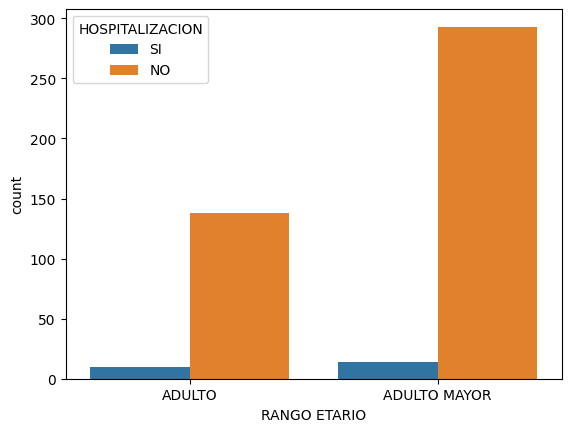

In [ ]:
# graficamos
sns.countplot(x="RANGO ETARIO", data=data, hue = 'HOSPITALIZACION')

<ipython-input-21-dfc1d9689094>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PSA'], hist=True, kde=False, rug=False)


<Axes: xlabel='PSA'>

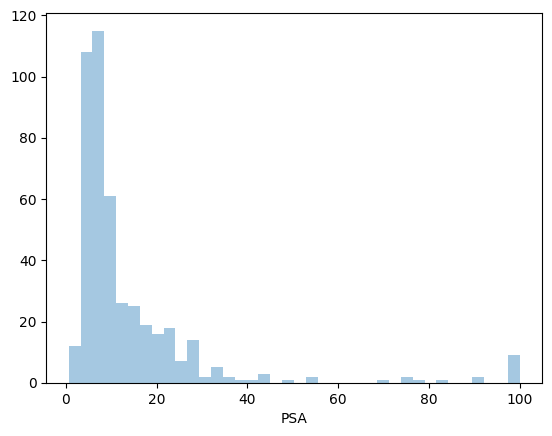

In [ ]:
# realizamos un histograma para ver la distribucion de la variable PSA
sns.distplot(data['PSA'], hist=True, kde=False, rug=False) 

<ipython-input-22-d456e61083df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['NUMERO DE MUESTRAS TOMADAS'], hist=True, kde=False, rug=False)


<Axes: xlabel='NUMERO DE MUESTRAS TOMADAS'>

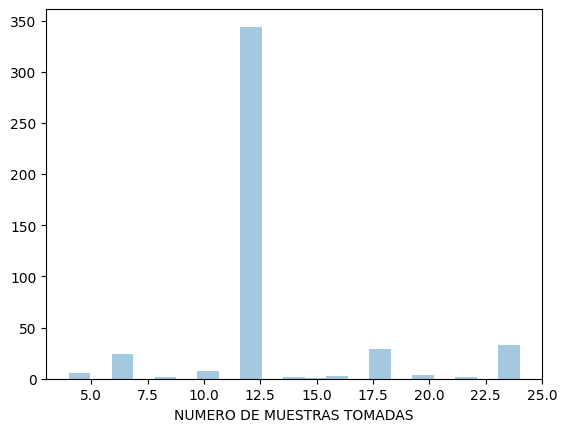

In [ ]:
#realizamos un histograma visualizar mejor la distribucion de los datos de la variable nro de muestras tomadas
sns.distplot(data['NUMERO DE MUESTRAS TOMADAS'], hist=True, kde=False, rug=False) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 567
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   DIABETES                           458 non-null    object  
 1   HOSPITALIZACIÓN ULTIMO MES         458 non-null    object  
 2   PSA                                454 non-null    float64 
 3   BIOPSIAS PREVIAS                   456 non-null    object  
 4   VOLUMEN PROSTATICO                 457 non-null    object  
 5   NUMERO DE MUESTRAS TOMADAS         458 non-null    int64   
 6   ENF. CRONICA PULMONAR OBSTRUCTIVA  456 non-null    object  
 7   BIOPSIA                            458 non-null    object  
 8   FIEBRE                             458 non-null    object  
 9   ITU                                458 non-null    object  
 10  HOSPITALIZACION                    455 non-null    object  
 11  RANGO ETARIO                       458 non-nu

Evaluación de variables categoricas

In [ ]:
# arreglamos algunos registros de la columna BIOPSIA y categorizamos
data['BIOPSIA']=data['BIOPSIA'].str.strip()

data['BIOPSIA']= data['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 7', 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 8',
                                            'ADENOCARCINOMA GLEASON 9', 'ADENOCARCINOMA GLEASON 10', 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
                                             'PROSTATITIS', 'HIPERPLASIA PROSTATICA'],
                                           ['POSITIVO', 'POSITIVO', 'POSITIVO', 'POSITIVO', 'POSITIVO', 'POSITIVO', 'SOSPECHOSO', 'SOSPECHOSO'])

data['BIOPSIA']= data['BIOPSIA'].replace(['NEG', 'POSITIVO', 'SOSPECHOSO'],
                                           ['0', '1', '2'])

data['BIOPSIA']= data['BIOPSIA'].astype(int)

In [ ]:
# arreglamos los registros de la columna ENF. CRONICA PULMONAR OBSTRUCTIVA
data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, EPOC':'SI', 'SI, ASMA':'SI'}, inplace=True)

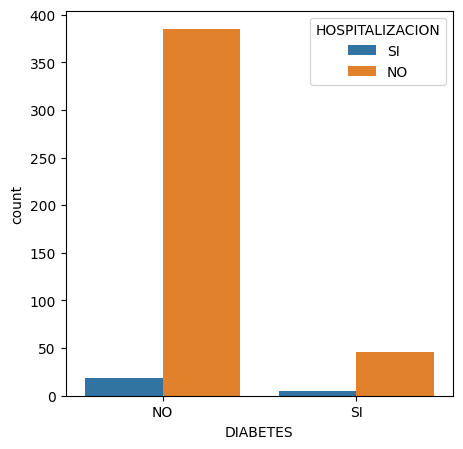

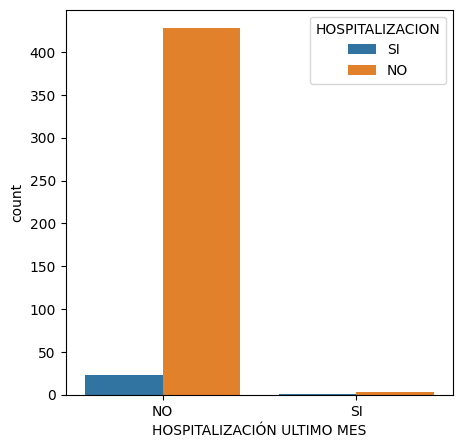

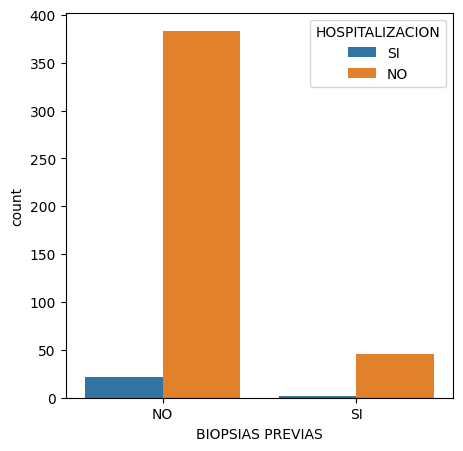

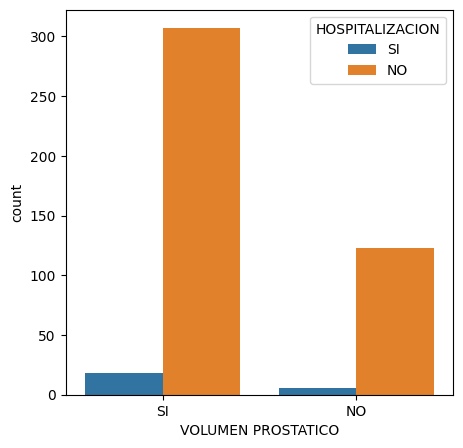

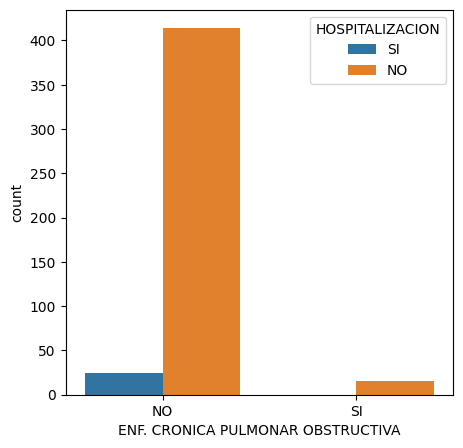

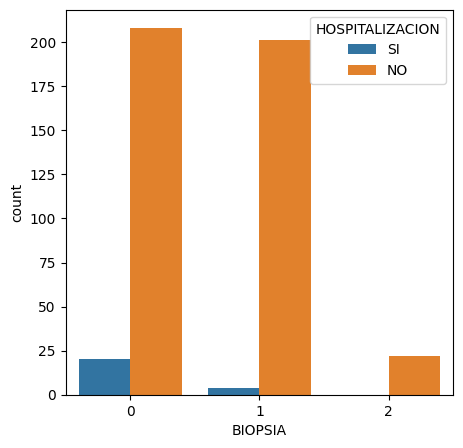

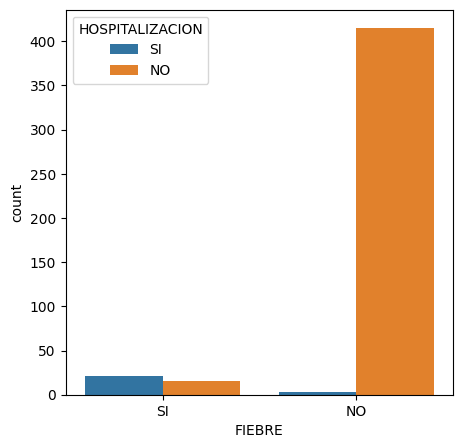

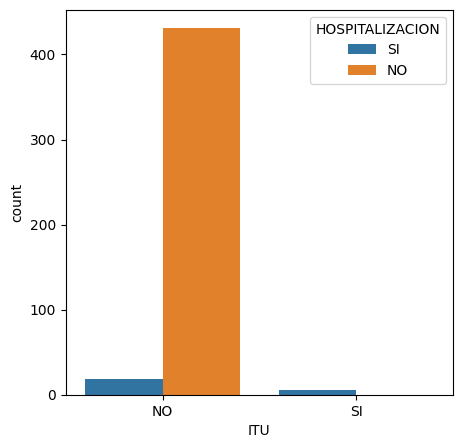

In [ ]:
# Graficamos la variable cualitativas para ver la relacion con la variable HOSPITALIZACION 

columnas=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA','FIEBRE','ITU' ]

for var in columnas:
  plt.figure(figsize=(5,5))
  sns.countplot(x=var, data=data, hue = 'HOSPITALIZACION')
  plt.show()

Evaluación de los registros nulos

In [ ]:
#revisamos la cant de nulos por columna
data.isnull().sum()

DIABETES                             0
HOSPITALIZACIÓN ULTIMO MES           0
PSA                                  4
BIOPSIAS PREVIAS                     2
VOLUMEN PROSTATICO                   1
NUMERO DE MUESTRAS TOMADAS           0
ENF. CRONICA PULMONAR OBSTRUCTIVA    2
BIOPSIA                              0
FIEBRE                               0
ITU                                  0
HOSPITALIZACION                      3
RANGO ETARIO                         0
dtype: int64

In [ ]:
#veamos si tienen datos de valor
data_filtrada=data[data['HOSPITALIZACION'].isnull() | data['ENF. CRONICA PULMONAR OBSTRUCTIVA'].isnull() | data['PSA'].isnull() | data['VOLUMEN PROSTATICO'].isnull() |  data['BIOPSIAS PREVIAS'].isnull()]

data_filtrada

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,HOSPITALIZACION,RANGO ETARIO
9,NO,NO,NaN,NO,NO,12,NO,0,SI,NO,SI,ADULTO
31,NO,NO,10.80,NO,NO,12,SI,1,NO,NO,NaN,ADULTO MAYOR
76,NO,NO,NaN,NO,NO,18,NO,2,NO,NO,NO,ADULTO
92,NO,NO,7.80,NaN,SI,12,NO,0,NO,NO,NO,ADULTO
100,NO,NO,5.80,NO,NO,12,NO,1,NO,NO,NaN,ADULTO MAYOR
103,NO,NO,NaN,SI,SI,16,NO,0,NO,NO,NO,ADULTO
109,NO,NO,7.00,NO,NO,12,NO,0,NO,NO,NaN,ADULTO MAYOR
121,NO,NO,NaN,NO,SI,6,NO,1,NO,NO,NO,ADULTO MAYOR
565,NO,NO,4.43,NaN,NaN,20,NO,0,NO,NO,NO,ADULTO MAYOR
566,NO,NO,8.00,NO,SI,12,NaN,1,NO,NO,NO,ADULTO MAYOR


In [ ]:
data_filtrada.shape[0]

# considerando que son 11 registros de 558 en total, y ademas son variables que aportan mayor peso al desbalance, se decide eliminar los registros nulos
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 564
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   DIABETES                           447 non-null    object  
 1   HOSPITALIZACIÓN ULTIMO MES         447 non-null    object  
 2   PSA                                447 non-null    float64 
 3   BIOPSIAS PREVIAS                   447 non-null    object  
 4   VOLUMEN PROSTATICO                 447 non-null    object  
 5   NUMERO DE MUESTRAS TOMADAS         447 non-null    int64   
 6   ENF. CRONICA PULMONAR OBSTRUCTIVA  447 non-null    object  
 7   BIOPSIA                            447 non-null    int64   
 8   FIEBRE                             447 non-null    object  
 9   ITU                                447 non-null    object  
 10  HOSPITALIZACION                    447 non-null    object  
 11  RANGO ETARIO                       447 non-nu

Transformaciones necesarias de las columnas 

In [ ]:
#Pasamos las variables a categoricas usando prepocessing 
from sklearn import preprocessing

columnas=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO', 'ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU', 'HOSPITALIZACION','RANGO ETARIO']
le = preprocessing.LabelEncoder()
for var in columnas:
  data[var] = le.fit_transform(data[var])

#revisamos los cambios
data.head()

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,HOSPITALIZACION,RANGO ETARIO
0,0,0,4.0,0,1,12,0,0,1,0,1,0
1,0,0,7.7,0,1,12,0,0,1,0,1,0
2,0,0,29.0,1,1,24,0,0,1,0,1,0
3,0,0,7.0,0,1,12,0,0,1,0,1,0
4,0,0,29.0,1,1,24,0,0,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 564
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DIABETES                           447 non-null    int64  
 1   HOSPITALIZACIÓN ULTIMO MES         447 non-null    int64  
 2   PSA                                447 non-null    float64
 3   BIOPSIAS PREVIAS                   447 non-null    int64  
 4   VOLUMEN PROSTATICO                 447 non-null    int64  
 5   NUMERO DE MUESTRAS TOMADAS         447 non-null    int64  
 6   ENF. CRONICA PULMONAR OBSTRUCTIVA  447 non-null    int64  
 7   BIOPSIA                            447 non-null    int64  
 8   FIEBRE                             447 non-null    int64  
 9   ITU                                447 non-null    int64  
 10  HOSPITALIZACION                    447 non-null    int64  
 11  RANGO ETARIO                       447 non-null    int64  

Hacemos una matriz de correlacion para evaluar si hay variables redundantes

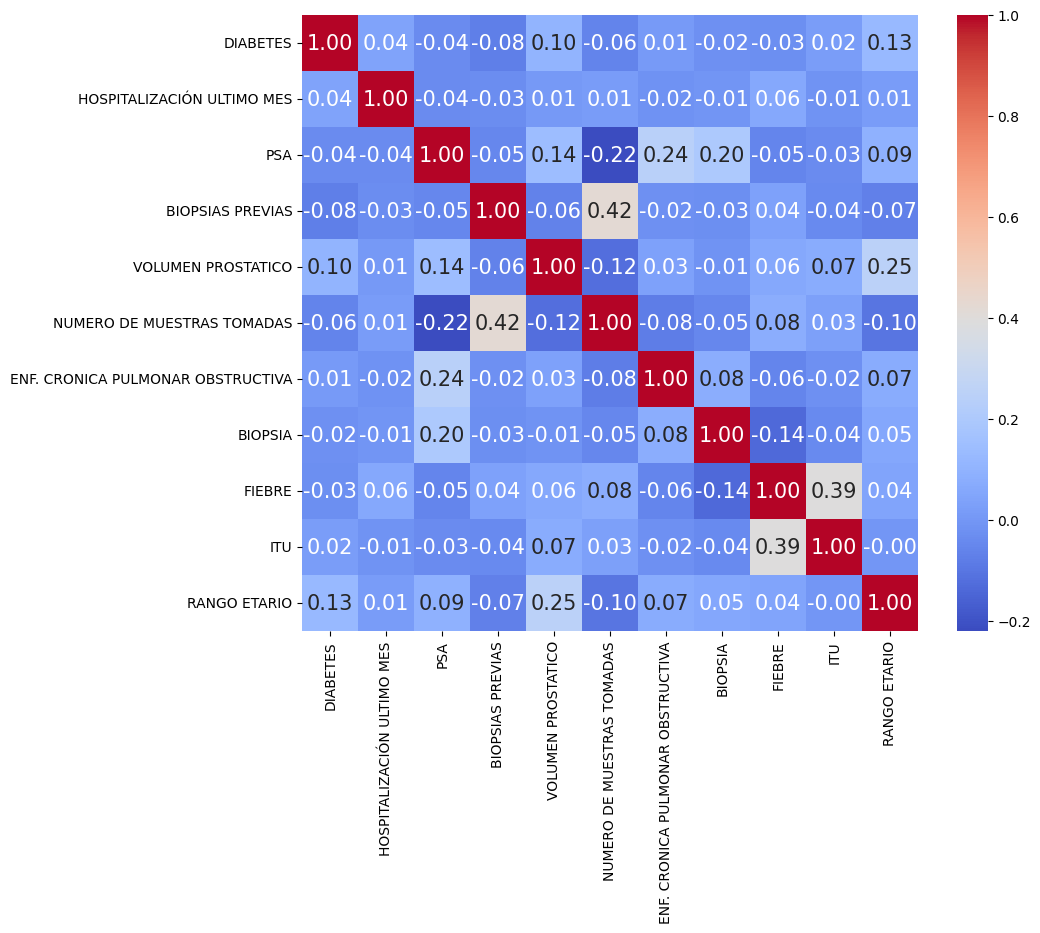

In [ ]:
corr = data.drop(columns = ['HOSPITALIZACION']).corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['HOSPITALIZACION']).columns, 
           yticklabels= data.drop(columns = ['HOSPITALIZACION']).columns,
           cmap= 'coolwarm')
plt.show()

Evaluamos si está desbalanceado el dataset

In [ ]:
data['HOSPITALIZACION'].value_counts() #efectivamente lo está, lo cual es común en dataset de hospitales

0    424
1     23
Name: HOSPITALIZACION, dtype: int64

Revisamos cuales son las variables mas importantes para la prediccion utilizando SelectKBest

Top 5 mejores variables atributos:
 ['PSA' 'NUMERO DE MUESTRAS TOMADAS' 'BIOPSIA' 'FIEBRE' 'ITU']


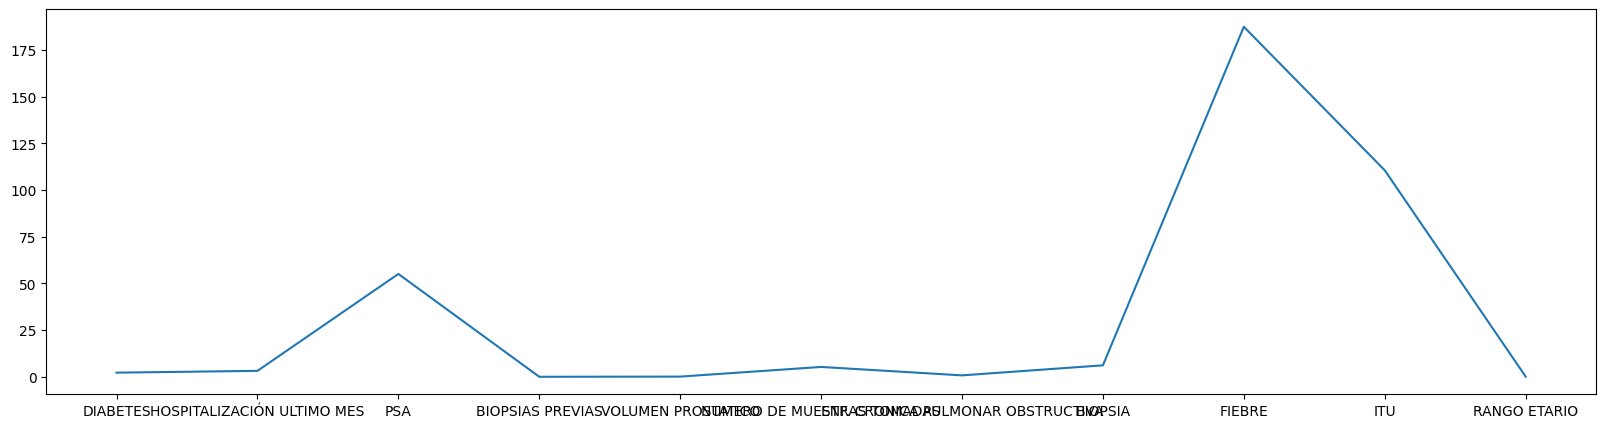

In [ ]:
# importamos las librerias
from sklearn.feature_selection import SelectKBest, chi2, f_regression

#definimos las variables atributos y la variable a predecir 
X = data.drop(columns=["HOSPITALIZACION"])
y = data['HOSPITALIZACION']

# seleccionamos 5 variables atributos 
select = SelectKBest(score_func=chi2, k=5)
z = select.fit_transform(X,y)

filter = select.get_support()
features = X.columns
 
print("Top 5 mejores variables atributos:\n",np.array(features[filter]))

#visualizamos
scores = select.scores_

plt.rcParams["figure.figsize"] = [20,5]
plt.plot(scores)
plt.xticks(np.arange(11),list(X.columns));

Exportación de dataset ya preparado para el modelamiento

In [ ]:
# data.to_csv('BBDD_Hospitalizacion_1.csv', index=False, encoding='utf-8')

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. El objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.

In [ ]:
# importamos las librerias a utilizar 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#seleccionamos los atributos y la variable a predecir 

columnas_entrenamiento = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES','PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
                          'ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE', 'ITU','RANGO ETARIO']

X=data[columnas_entrenamiento]
y=data["HOSPITALIZACION"]

In [ ]:
#separamos el conjunto en set de entrenamiento y testeo tomando en cuenta la proporciones de etiquetas  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=60, stratify=y)

In [ ]:
#normalizamos 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# evaluamos la distribucion de los datos en cada set para ver si esta proporcionado
print('Proporción de etiquetas positivas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas positivas en set de testeo:', y_test.sum()/y_test.count())

#si bien esta proporcionado se puede ver que la distribucion es baja por el desbalance del dataset

Proporción de etiquetas positivas en set de entrenamiento: 0.05172413793103448
Proporción de etiquetas positivas en set de testeo: 0.050955414012738856


## Arbol de decision

In [ ]:
# Instanciamos y entrenamos el árbol sin indicar el numero max de ramas (arbol infinito)

clf = DecisionTreeClassifier(max_depth =None)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predecimos sobre nuestro set de entrenamiento
y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo
y_test_pred = clf.predict(X_test)

In [ ]:
# Evaluamos la prediccion con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)) 
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.996551724137931
Accuracy sobre conjunto de Test: 1.0


Matriz de confusion para modelo arbol de decision 

In [ ]:
matrix_1 = confusion_matrix(y_train, y_train_pred, ) #para el set de entrenamiento
matrix_2 = confusion_matrix(y_test, y_test_pred) #para set de testeo

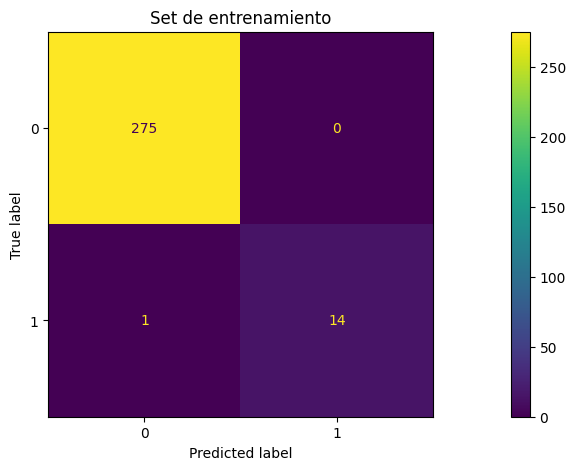

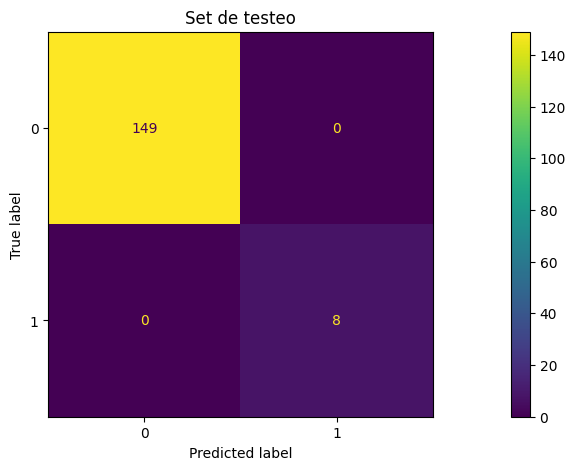

In [ ]:
# visualizamos con mapa de calor 
cm_display = ConfusionMatrixDisplay(matrix_1) #para el set de entrenamiento
cm_display_2 = ConfusionMatrixDisplay(matrix_2) #para el set de testeo

cm_display.plot()
plt.title('Set de entrenamiento')
plt.show()

cm_display_2.plot()
plt.title('Set de testeo')
plt.show()

Evaluacion del modelo

In [ ]:
exactitud = accuracy_score(y_test, y_test_pred) #resultados correctos sobre el total de muestras seleccionadas
print('Exactitud del testeo: ',exactitud) 

precision = precision_score(y_test, y_test_pred, average= None) # Se le da mayor relevancia a los verdaderos negativos.(tp/tp+fP)
print('Precision del testeo para las distintas categorias: ',precision)

sensibilidad = recall_score(y_test, y_test_pred, average= None) #resultados correctos por sobre todos los resultados que buscamos identificar. (tp/tp+fn)
print('Sensibilidad del testeo para las distintas categorias ', sensibilidad) 

puntuacion = f1_score(y_test, y_test_pred, average= None) #combinacion de recall y precision
print('Puntuacion obtenida',puntuacion) 

Exactitud del testeo:  1.0
Precision del testeo para las distintas categorias:  [1. 1.]
Sensibilidad del testeo para las distintas categorias  [1. 1.]
Puntuacion obtenida [1. 1.]


Diagrama de importancia de cada variable atributo en la predicción 

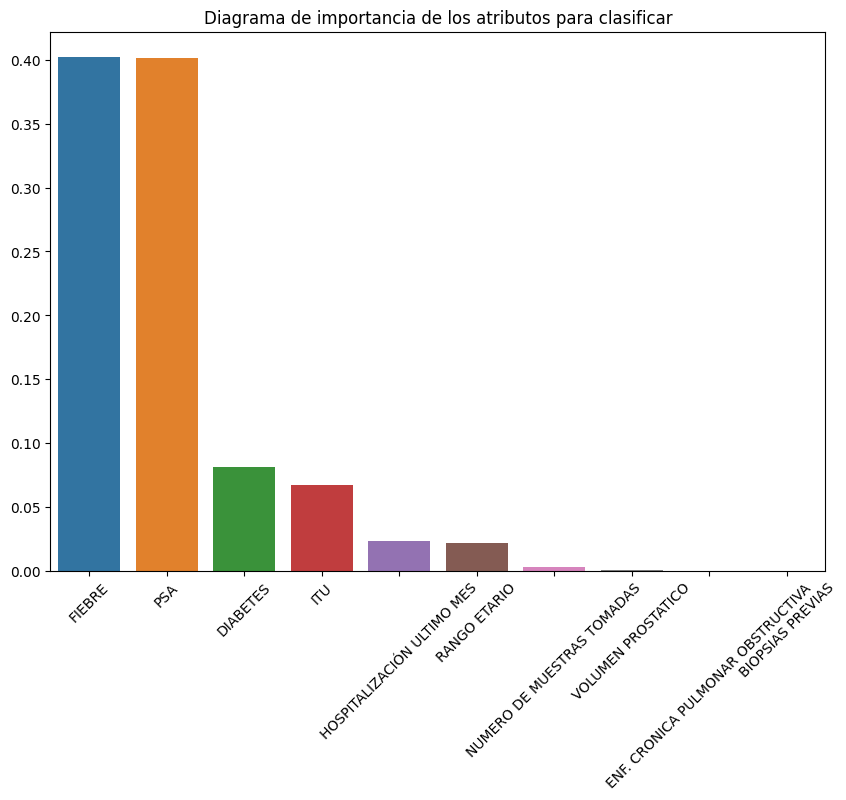

In [ ]:
importances = clf.feature_importances_
columnas = data[columnas_entrenamiento].columns
indices = np.argsort(importances)[::-1]

#visualizamos 
plt.figure(figsize = (10,7))
sns.barplot(x = columnas[indices], y = importances[indices])
plt.xticks(rotation=45)
plt.title('Diagrama de importancia de los atributos para clasificar')
plt.show()


Optimizacion de hiperparametros

In [ ]:
# Creamos la grilla de hiperparámetros para el modelo arbol
param_grid = {'max_depth':np.arange(1, 20),
              'criterion': ['gini', 'entropy'],
              'class_weight': [None,'balanced']} 

 #instanciamos el modelo
clf_1 = DecisionTreeClassifier()

# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(clf_1, param_grid=param_grid, cv=4)

# Entrenamos
model.fit(X_train, y_train)

#revisamos los hiperparametros optimos
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2}
Mejor Score: 0.9826864535768646



Creación de modelo con los hiperparametros obtenidos 


In [ ]:
# Instanciamos y entrenamos el árbol indicando los hiperparametros optimos 

clf_1 = DecisionTreeClassifier(max_depth =2, class_weight = None, criterion= 'gini')
clf_1.fit(X_train, y_train)

# Predecimos sobre nuestro set de entrenamiento
y_train_pred_1= clf_1.predict(X_train)

# Predecimos sobre nuestro set de testeo
y_test_pred_1= clf_1.predict(X_test)

# Evaluamos la prediccion con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred_1,y_train)) 
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred_1,y_test))

Accuracy sobre conjunto de Train: 0.9827586206896551
Accuracy sobre conjunto de Test: 0.9872611464968153


MODELO KNN

In [ ]:
# instanciamos y entrenamos el modelo 
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred= knn.predict(X_train)

# Predecimos sobre nuestro set de testeo
y_test_pred = knn.predict(X_test)

In [ ]:
# Evaluamos la prediccion con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)) 
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9724137931034482
Accuracy sobre conjunto de Test: 0.9745222929936306


Evaluación del modelo K vecinos

In [ ]:
exactitud = accuracy_score(y_test, y_test_pred)
print('Exactitud del testeo: ',exactitud) 

precision = precision_score(y_test, y_test_pred, average= None)
print('Precision del testeo para las distintas categorias: ',precision)

sensibilidad = recall_score(y_test, y_test_pred, average= None)
print('Sensibilidad del testeo para las distintas categorias ', sensibilidad) 

puntuacion = f1_score(y_test, y_test_pred, average= None)
print('Puntuacion',puntuacion) 

Exactitud del testeo:  0.9745222929936306
Precision del testeo para las distintas categorias:  [0.97385621 1.        ]
Sensibilidad del testeo para las distintas categorias  [1.  0.5]
Puntuacion [0.98675497 0.66666667]


Optimizacion de hiperparametros

In [ ]:
# Creamos la grilla de hiperparámetros para el modelo de vecinos más cercanos

param_grid = {'n_neighbors':np.arange(1, 20), #puede ser incluso mas grande
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

# Instanciamos el modelo KNN
knn_1= KNeighborsClassifier()

# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(knn_1, param_grid=param_grid, cv=4)

# Entrenamos
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 12, 'weights': 'distance'}
Mejor Score: 0.9793093607305936



In [ ]:
# Instanciamos y entrenamos el modelo indicando los hiperparametros optimos obtenidos

knn_1 = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_neighbors= 12, weights= 'distance')
knn_1.fit(X_train, y_train)

# Predecimos sobre nuestro set de entrenamiento
y_train_pred_1= knn_1.predict(X_train)

# Predecimos sobre nuestro set de testeo
y_test_pred_1= knn_1.predict(X_test)

# Evaluamos la prediccion con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred_1,y_train)) 
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred_1,y_test))

Accuracy sobre conjunto de Train: 0.996551724137931
Accuracy sobre conjunto de Test: 0.9872611464968153


In [ ]:
exactitud = accuracy_score(y_test, y_test_pred_1)
print('Exactitud del testeo: ',exactitud) 

precision = precision_score(y_test, y_test_pred_1, average= None)
print('Precision del testeo para las distintas categorias: ',precision)

sensibilidad = recall_score(y_test, y_test_pred_1, average= None)
print('Sensibilidad del testeo para las distintas categorias ', sensibilidad) 

puntuacion = f1_score(y_test, y_test_pred_1, average= None)
print('Puntuacion',puntuacion) 

Exactitud del testeo:  0.9872611464968153
Precision del testeo para las distintas categorias:  [0.98675497 1.        ]
Sensibilidad del testeo para las distintas categorias  [1.   0.75]
Puntuacion [0.99333333 0.85714286]


**Conclusiones finales**

Al evaluar la importancia de los atributos para la clasificación de la variable objetivo se puede observar que PSA y FIEBRE tienen mucha diferencia en comparación del resto, tal como se obtuvo utilizando "SelectKBest", por lo que se debe tener cuidado para evitar caer en 'overfitting'.

Por otro lado, se considera que el modelo K vecinos es el mas optimo para el dataset en estudio debido a que el conjunto de datos es pequeño.





